In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
data = pd.read_csv('grouped_labelsnew.csv')
data.head(), data.columns

(  analysis_result                                               text  \
 0           Vague                      Status of the card I ordered.   
 1  Both Incorrect   How would I use my money in a different country?   
 2           Vague       I want to go back on what I did this morning   
 3  Both Incorrect  How do I top up my card using your app? I'm ne...   
 4           Vague                                  how can i top up?   
 
              category          predicted_label  predicted_confidence  \
 0        card_arrival      lost_or_stolen_card              0.374374   
 1    exchange_via_app          receiving_money              0.560737   
 2     cancel_transfer    edit_personal_details              0.274555   
 3  topping_up_by_card  apple_pay_or_google_pay              0.372667   
 4  topping_up_by_card            top_up_limits              0.917691   
 
              primary_label  cluster_confidence  confidence_difference  \
 0      order_physical_card            0.33757

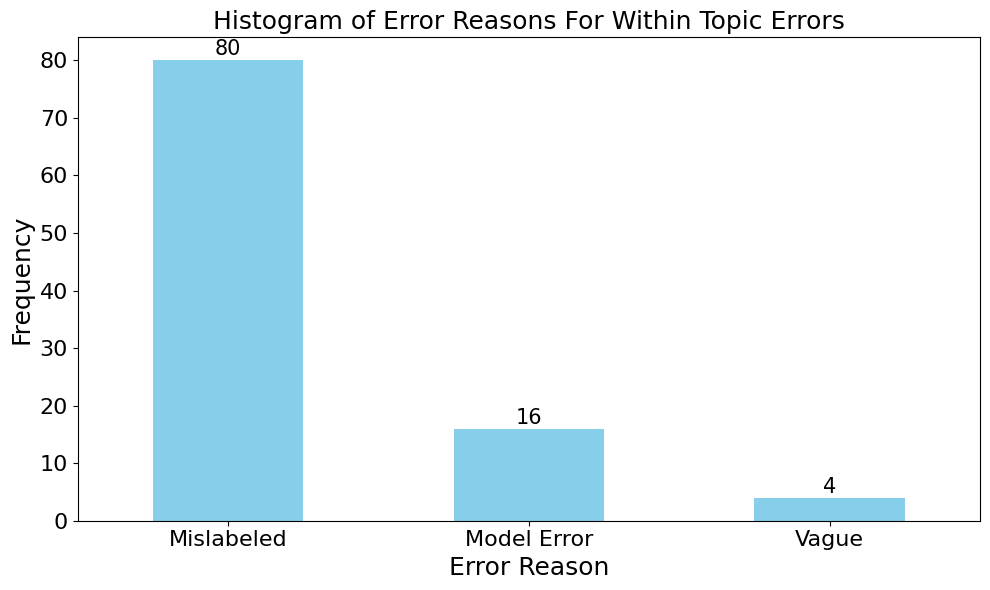

In [ ]:
topic_of_interest = 'Within'
error_data_topic_within = data[data['Topic'] == topic_of_interest]
# Plotting the histogram for error reasons
plt.figure(figsize=(10, 6))
bars = error_data_topic_within['analysis_result'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Histogram of Error Reasons For ' + topic_of_interest + ' Topic Errors', fontsize=18)
plt.xlabel('Error Reason', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(rotation=0, fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()

for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.0f'),
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='center',
                 size=15, xytext=(0, 8),
                 textcoords='offset points')

plt.savefig('error_reasons_distribution_within_' + topic_of_interest + '.png', dpi=300)
plt.show()

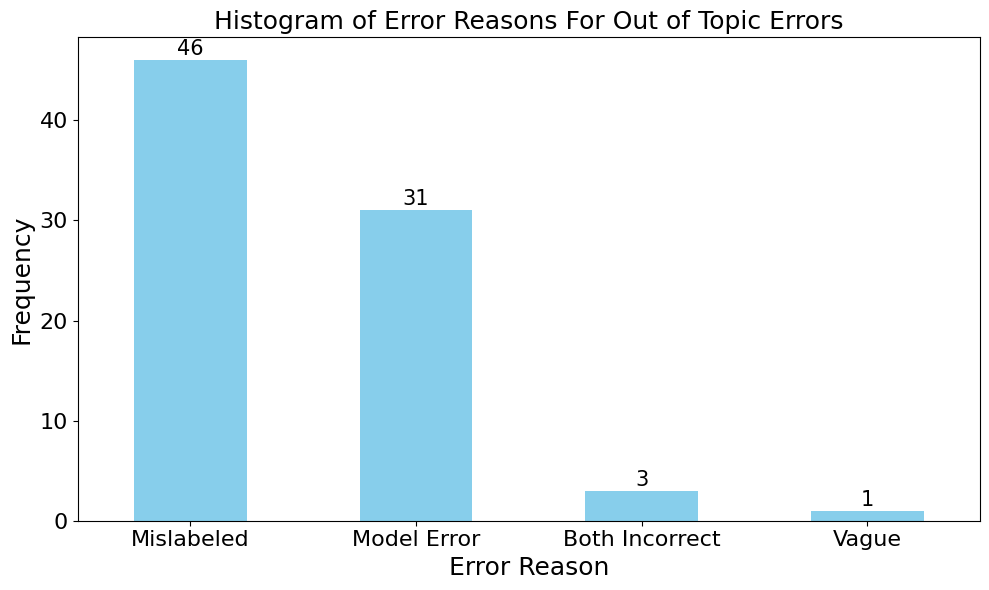

In [ ]:
topic_of_interest = 'Without'
error_data_topic_without = data[data['Topic'] == topic_of_interest]
# Plotting the histogram for error reasons
plt.figure(figsize=(10, 6))
bars = error_data_topic_without['analysis_result'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Histogram of Error Reasons For Out of Topic Errors', fontsize=18)
plt.xlabel('Error Reason', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(rotation=0, fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()

for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.0f'),
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='center',
                 size=15, xytext=(0, 8),
                 textcoords='offset points')

plt.savefig('error_reasons_distribution_within_' + topic_of_interest + '.png', dpi=300)
plt.show()

<Figure size 1600x1000 with 0 Axes>

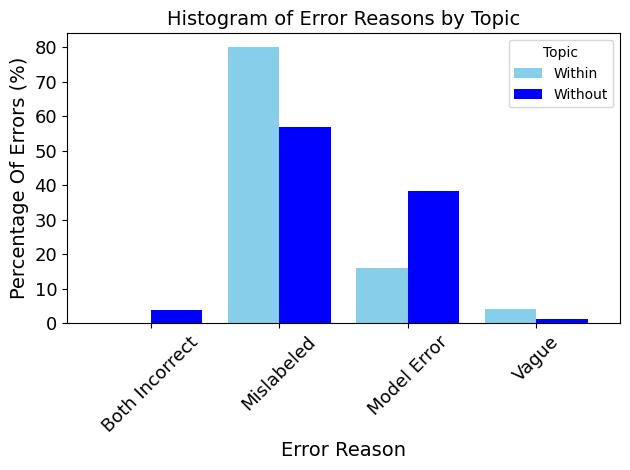

In [ ]:
error_data_within = data[data['Topic'] == 'Within']['analysis_result'].value_counts(normalize=True) * 100

error_data_without = data[data['Topic'] == 'Without']['analysis_result'].value_counts(normalize=True) * 100

error_data_combined = pd.DataFrame({
    'Within': error_data_within,
    'Without': error_data_without
}).fillna(0)

if 'Both incorrect' in error_data_combined.index:

    sort_key = {name: (name == 'Both incorrect') for name in error_data_combined.index}
    error_data_combined = error_data_combined.sort_values(by='Without', key=lambda x: x.index.map(sort_key))

# Creating a figure
plt.figure(figsize=(16, 10))

# Plotting the data
ax = error_data_combined.plot(kind='bar', color=['skyblue', 'blue'], width=0.8)
plt.title('Histogram of Error Reasons by Topic', fontsize=14)
plt.xlabel('Error Reason', fontsize=14)
plt.ylabel('Percentage Of Errors (%)', fontsize=14)
plt.xticks(rotation=45, fontsize=13)
plt.yticks(fontsize=13)
plt.legend(title='Topic')

plt.tight_layout()
plt.show()


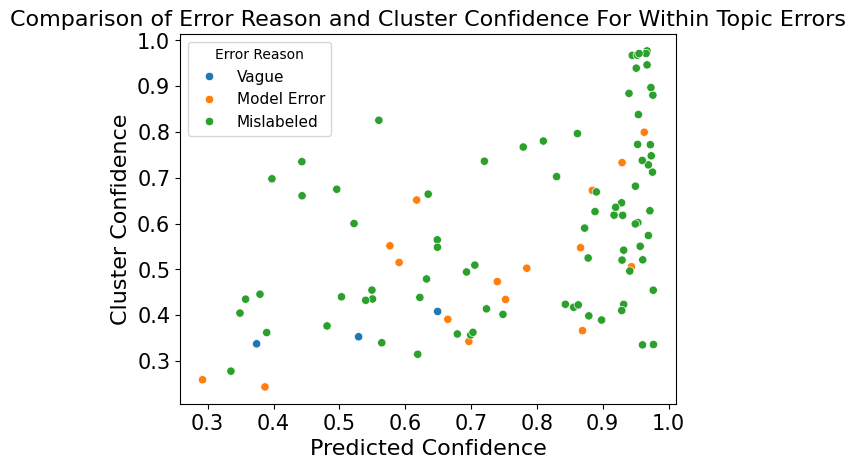

In [ ]:

topic_of_interest = 'Within'
error_data_topic = data[data['Topic'] == topic_of_interest]
sns.scatterplot(data=error_data_topic, x="predicted_confidence", y="cluster_confidence", hue="analysis_result")
plt.title('Comparison of Error Reason and Cluster Confidence For Within Topic Errors', fontsize=16)
plt.xlabel('Predicted Confidence', fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Cluster Confidence', fontsize=16)
plt.legend(title="Error Reason",fontsize=11)
plt.savefig('error_reasons_scatter.png', dpi=300)
plt.show()

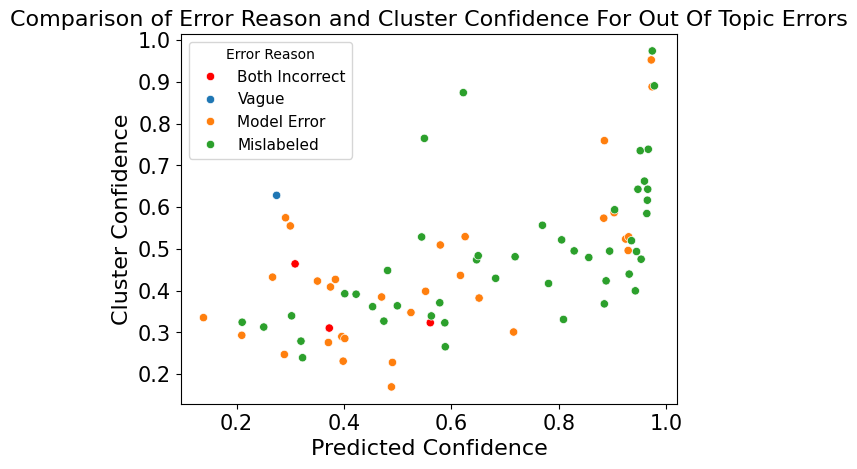

In [ ]:
colors = {
    'Both Incorrect': 'red',
    'Vague': 'tab:blue',
    'Model Error': 'tab:orange',
    'Mislabeled': 'tab:green'
}

topic_of_interest = 'Without'
error_data_topic = data[data['Topic'] == topic_of_interest]
sns.scatterplot(data=error_data_topic, x="predicted_confidence", y="cluster_confidence", hue="analysis_result",palette=colors)
plt.title('Comparison of Error Reason and Cluster Confidence For Out Of Topic Errors', fontsize=16)
plt.xlabel('Predicted Confidence', fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Cluster Confidence', fontsize=16)
plt.legend(title="Error Reason",fontsize=11)
plt.savefig('error_reasons_scatter.png', dpi=300)
plt.show()

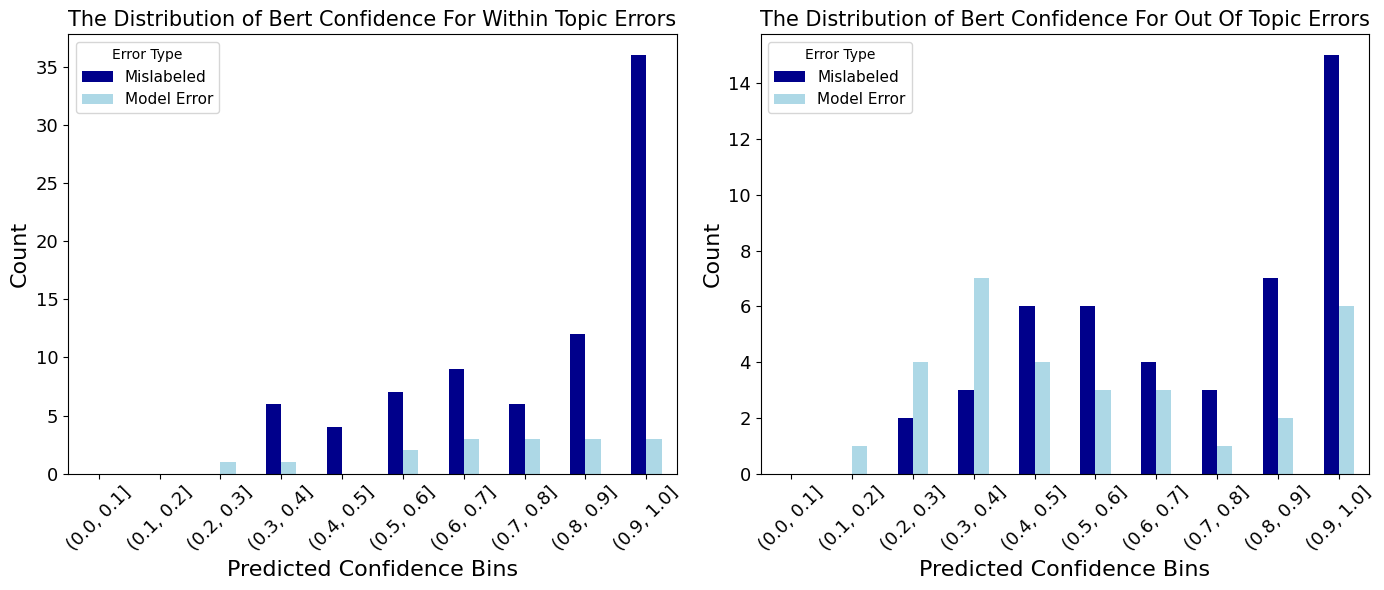

In [ ]:

topic_of_interest = 'Within'

data_within_topic = data[data['Topic'] == topic_of_interest]
data_without_topic = data[data['Topic'] != topic_of_interest]

data_within_topic = data_within_topic[data_within_topic['analysis_result'].isin(['Model Error', 'Mislabeled'])]
data_without_topic = data_without_topic[data_without_topic['analysis_result'].isin(['Model Error', 'Mislabeled'])]

bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]


data_within_topic['predicted_bins'] = pd.cut(data_within_topic['predicted_confidence'], bins)
data_without_topic['predicted_bins'] = pd.cut(data_without_topic['predicted_confidence'], bins)

# Grouping and counting occurrences
within_topic_grouped = data_within_topic.groupby(['predicted_bins', 'analysis_result']).size().unstack().fillna(0)
without_topic_grouped = data_without_topic.groupby(['predicted_bins', 'analysis_result']).size().unstack().fillna(0)

# Define colors
colors = ['darkblue','lightblue']

# Plotting
plt.figure(figsize=(14, 6))

# Plot for 'Within Topic'
plt.subplot(1, 2, 1)
within_topic_grouped.plot(kind='bar', stacked=False, ax=plt.gca(), color=colors)
plt.title('The Distribution of Bert Confidence For Within Topic Errors' , fontsize=15)
plt.xlabel('Predicted Confidence Bins', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=13,rotation=45)
plt.yticks(fontsize=13)
plt.legend(title="Error Type", labels=within_topic_grouped.columns,fontsize=11)

# Plot for 'Without Topic'
plt.subplot(1, 2, 2)
without_topic_grouped.plot(kind='bar', stacked=False, ax=plt.gca(), color=colors)
plt.title('The Distribution of Bert Confidence For Out Of Topic Errors', fontsize=15)
plt.xlabel('Predicted Confidence Bins',fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=13,rotation=45)
plt.yticks(fontsize=13)
plt.legend(title="Error Type", labels=without_topic_grouped.columns,fontsize=11)

plt.tight_layout()
plt.show()



<ipython-input-26-c788d5ed7080>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mislabels_within_topic['cluster_bins'] = pd.cut(mislabels_within_topic['cluster_confidence'], bins)
<ipython-input-26-c788d5ed7080>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mislabels_without_topic['cluster_bins'] = pd.cut(mislabels_without_topic['cluster_confidence'], bins)


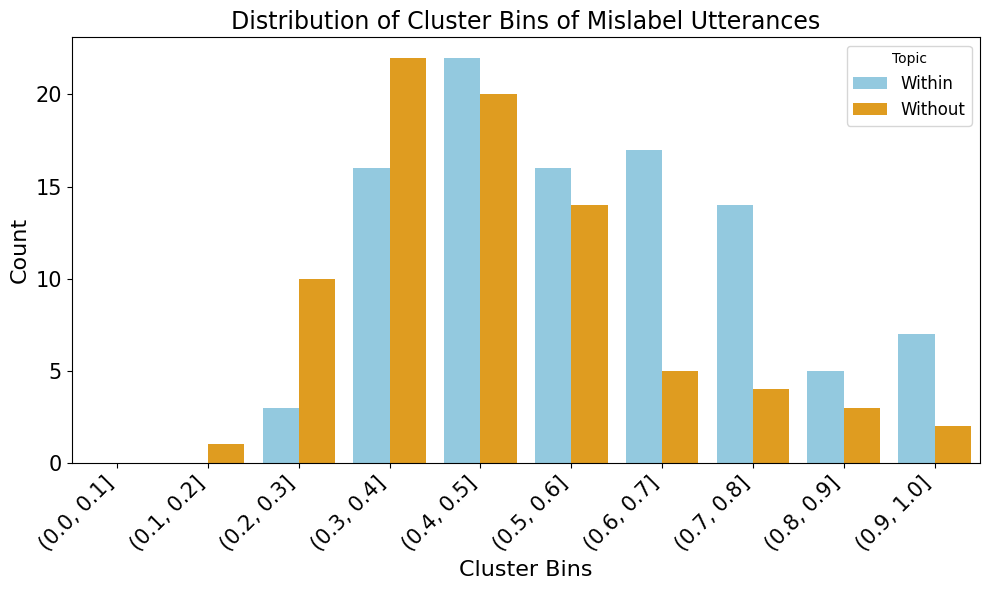

In [ ]:
# Filter data for items where the analysis result is "Model Error"
topic_of_interest = 'Within'
mislabels_within_topic = data[data['Topic'] == topic_of_interest]
mislabels_without_topic = data[data['Topic'] != topic_of_interest]
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
mislabels_within_topic['cluster_bins'] = pd.cut(mislabels_within_topic['cluster_confidence'], bins)
mislabels_without_topic['cluster_bins'] = pd.cut(mislabels_without_topic['cluster_confidence'], bins)

combined_data = pd.concat([mislabels_within_topic, mislabels_without_topic])

# Plotting the distribution of cluster bins for mislabeled utterances
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_data, x='cluster_bins', hue='Topic', palette=['skyblue', 'orange'])
plt.title('Distribution of Cluster Bins of Mislabel Utterances', fontsize=17)
plt.xlabel('Cluster Bins', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.legend(title="Topic", fontsize=12)
plt.show()
